In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
from salishsea_tools import viz_tools
import cmocean as cm

#### Import data

In [13]:
BoundaryFile = xr.open_dataset('/results/forcing/SalishSeaCast/bdy_ts/ts_S_y2023m02d25.nc')
BoundaryFile_Feb26 = xr.open_dataset('/results/forcing/SalishSeaCast/bdy_ts/ts_S_y2023m02d26.nc')

phys_gridU = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/25feb23/sss150_1h_20230225_20230225_grid_U.nc')

#### Boundary Files

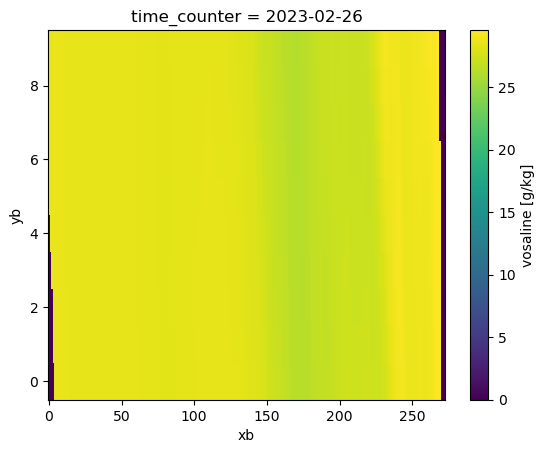

In [3]:
BoundaryFile.vosaline[23,0].plot()

Text(0.5, 0.98, 'Salinity')

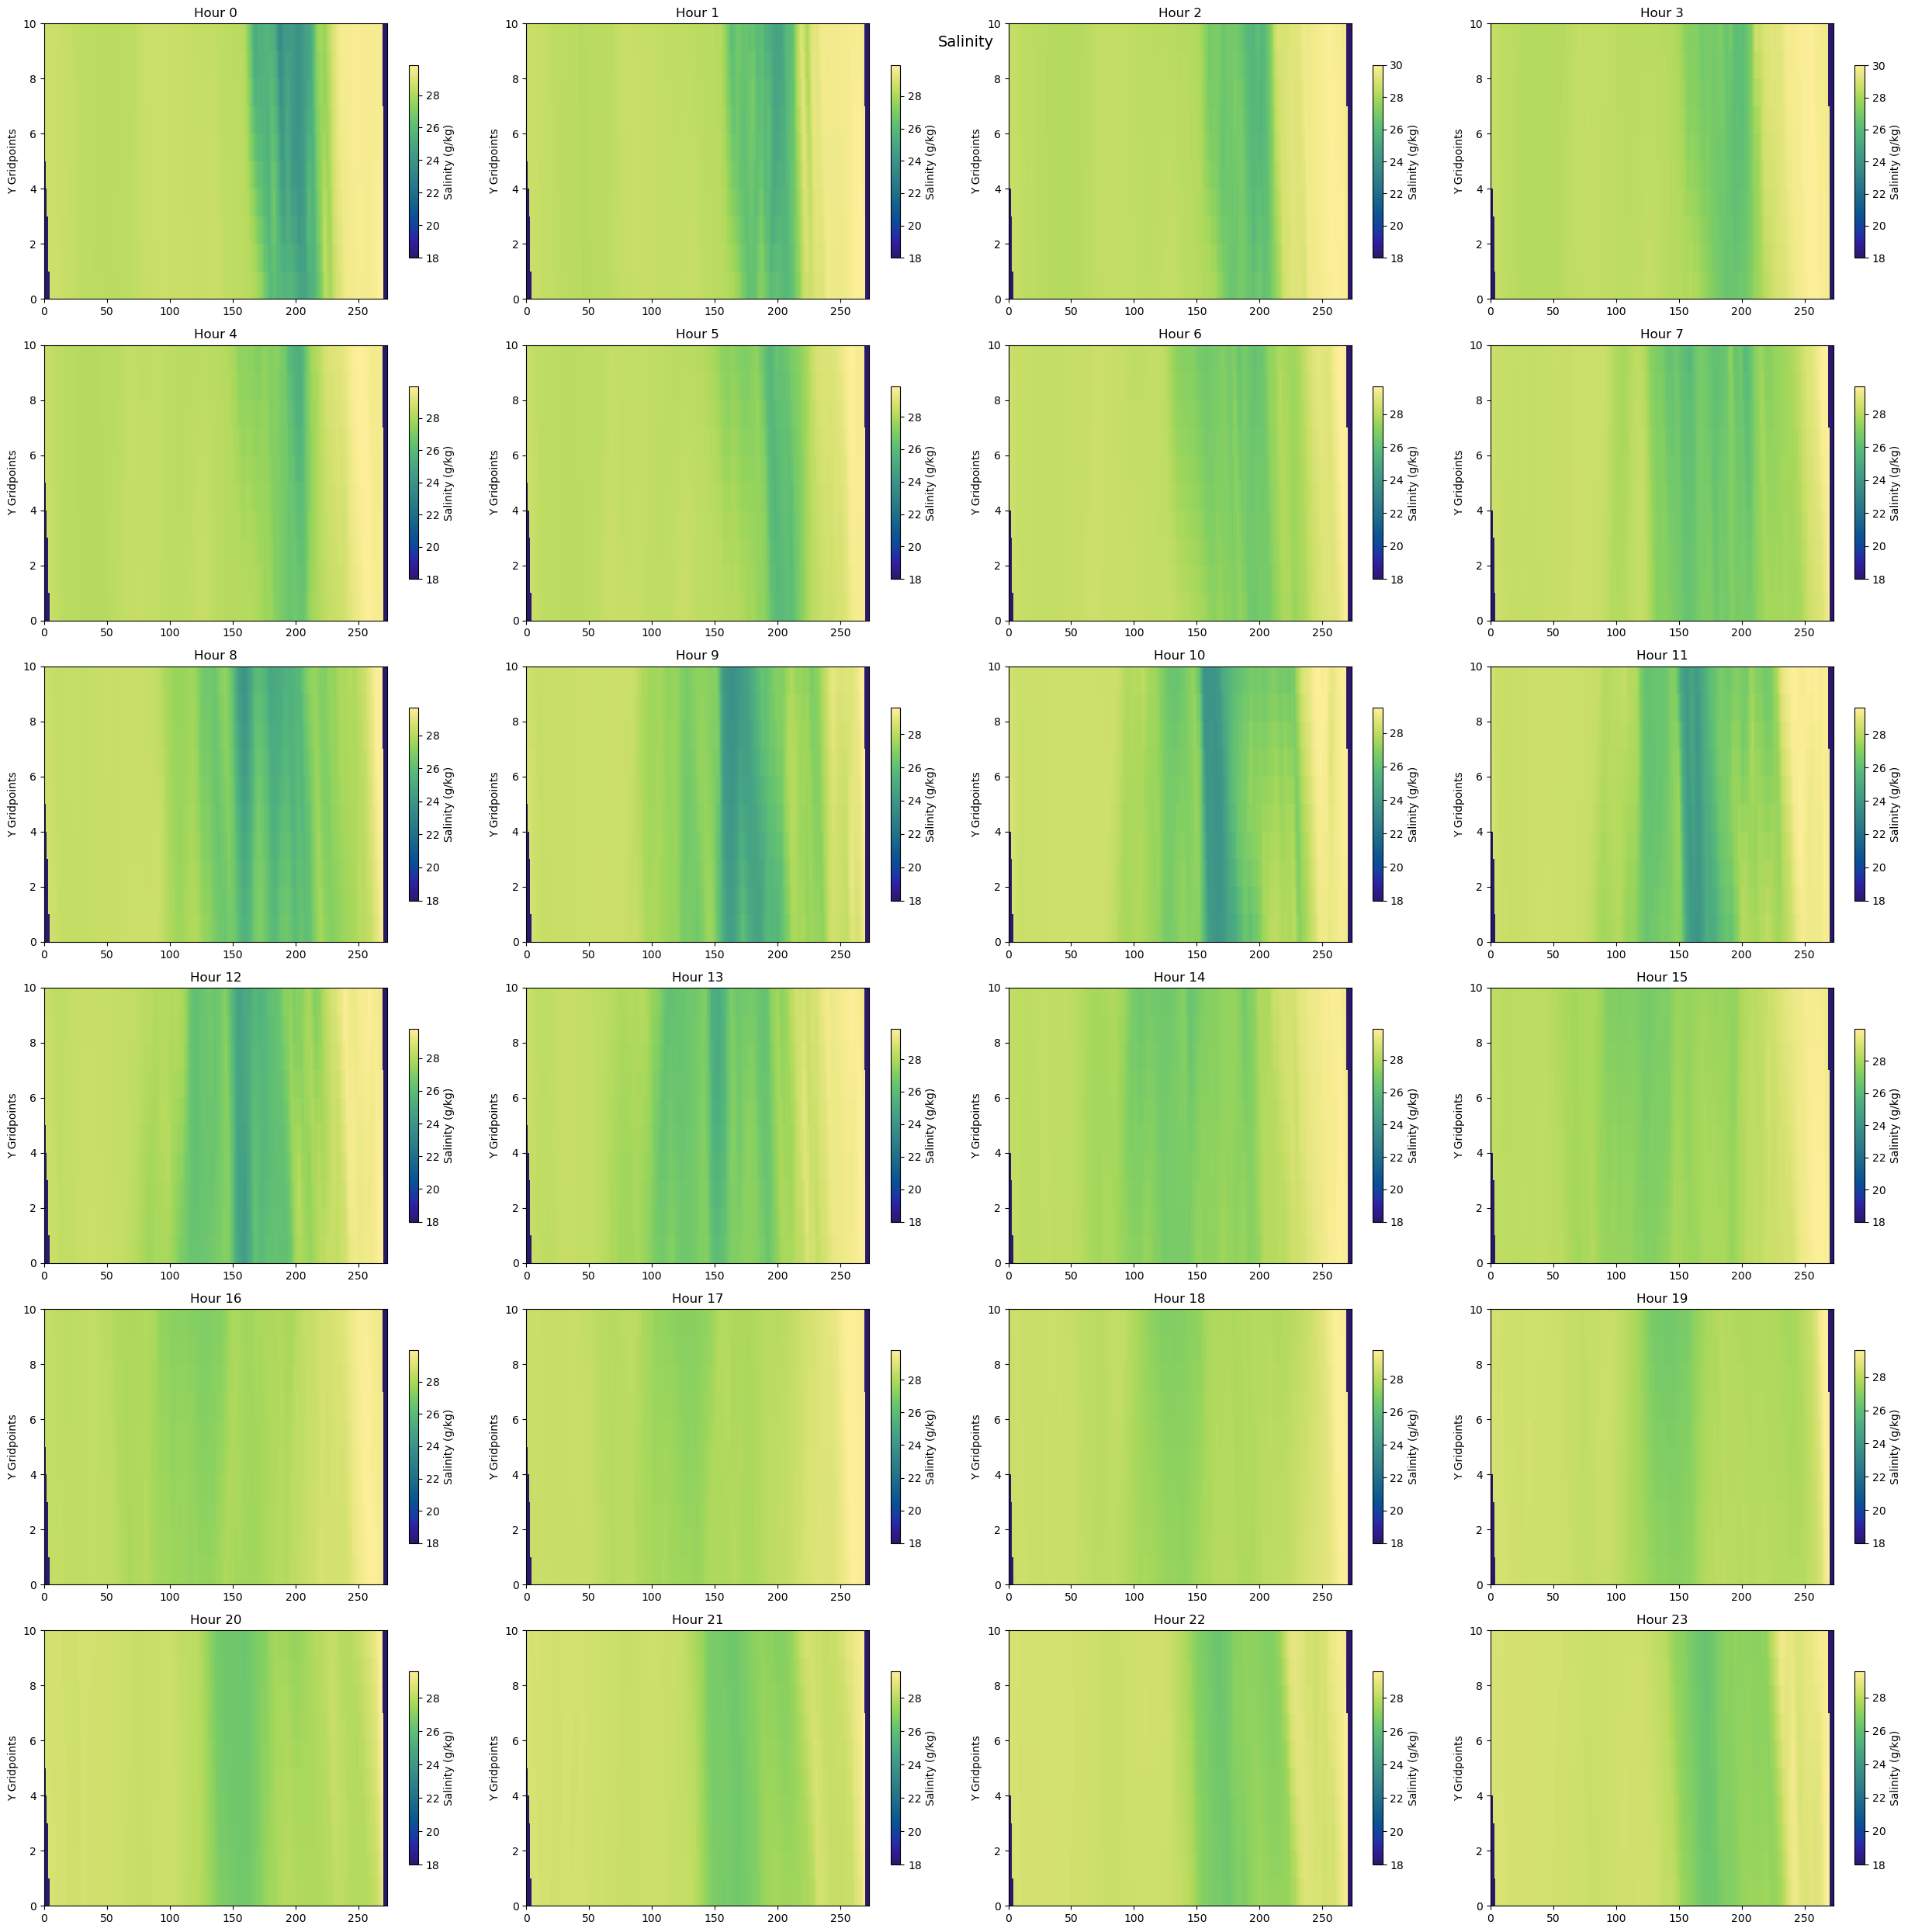

In [5]:
nrows = 6
ncols = 4

fig, ax = plt.subplots(nrows,ncols,figsize=(25, 25))
cmap = cm.cm.haline
cmap.set_bad('gray')

date = pd.DatetimeIndex(phys_gridU.time_counter.values)

for i in range(nrows):
    for j in range(ncols):
    
        vfull = BoundaryFile.vosaline[i*ncols+j, 0]
        ax[i,j].pcolormesh(vfull,vmin=18)
        colours = ax[i,j].pcolormesh(vfull, cmap=cmap,vmin=18)
        cb = fig.colorbar(colours, ax=ax[i,j],shrink=0.7)
        cb.set_label('Salinity (g/kg)')
        # viz_tools.set_aspect(ax[i,j]);
        ax[i,j].set_ylabel('Y Gridpoints')
        ax[i,j].set_title(f'Hour {date[i*ncols+j].hour}')

fig.tight_layout()
fig.suptitle('Salinity',fontsize=14)


Text(0.5, 1.0, '23:30 - 00:30')

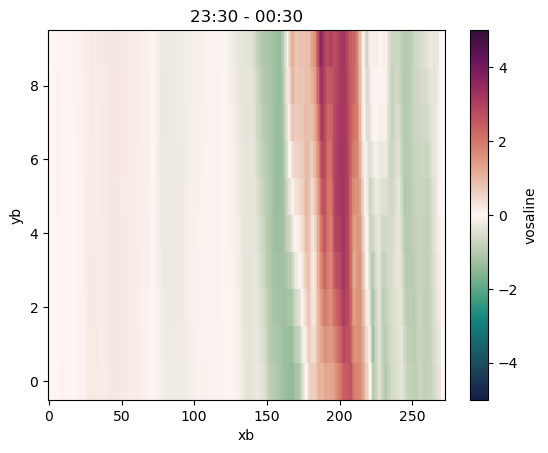

In [19]:
(BoundaryFile.vosaline[23,0]-BoundaryFile.vosaline[0,0]).plot(cmap = cm.cm.curl,vmin=-5,vmax=5)
plt.title('23:30 - 00:30')

### 26Feb23

Text(0.5, 0.98, 'Boundary Salinity - Feb26')

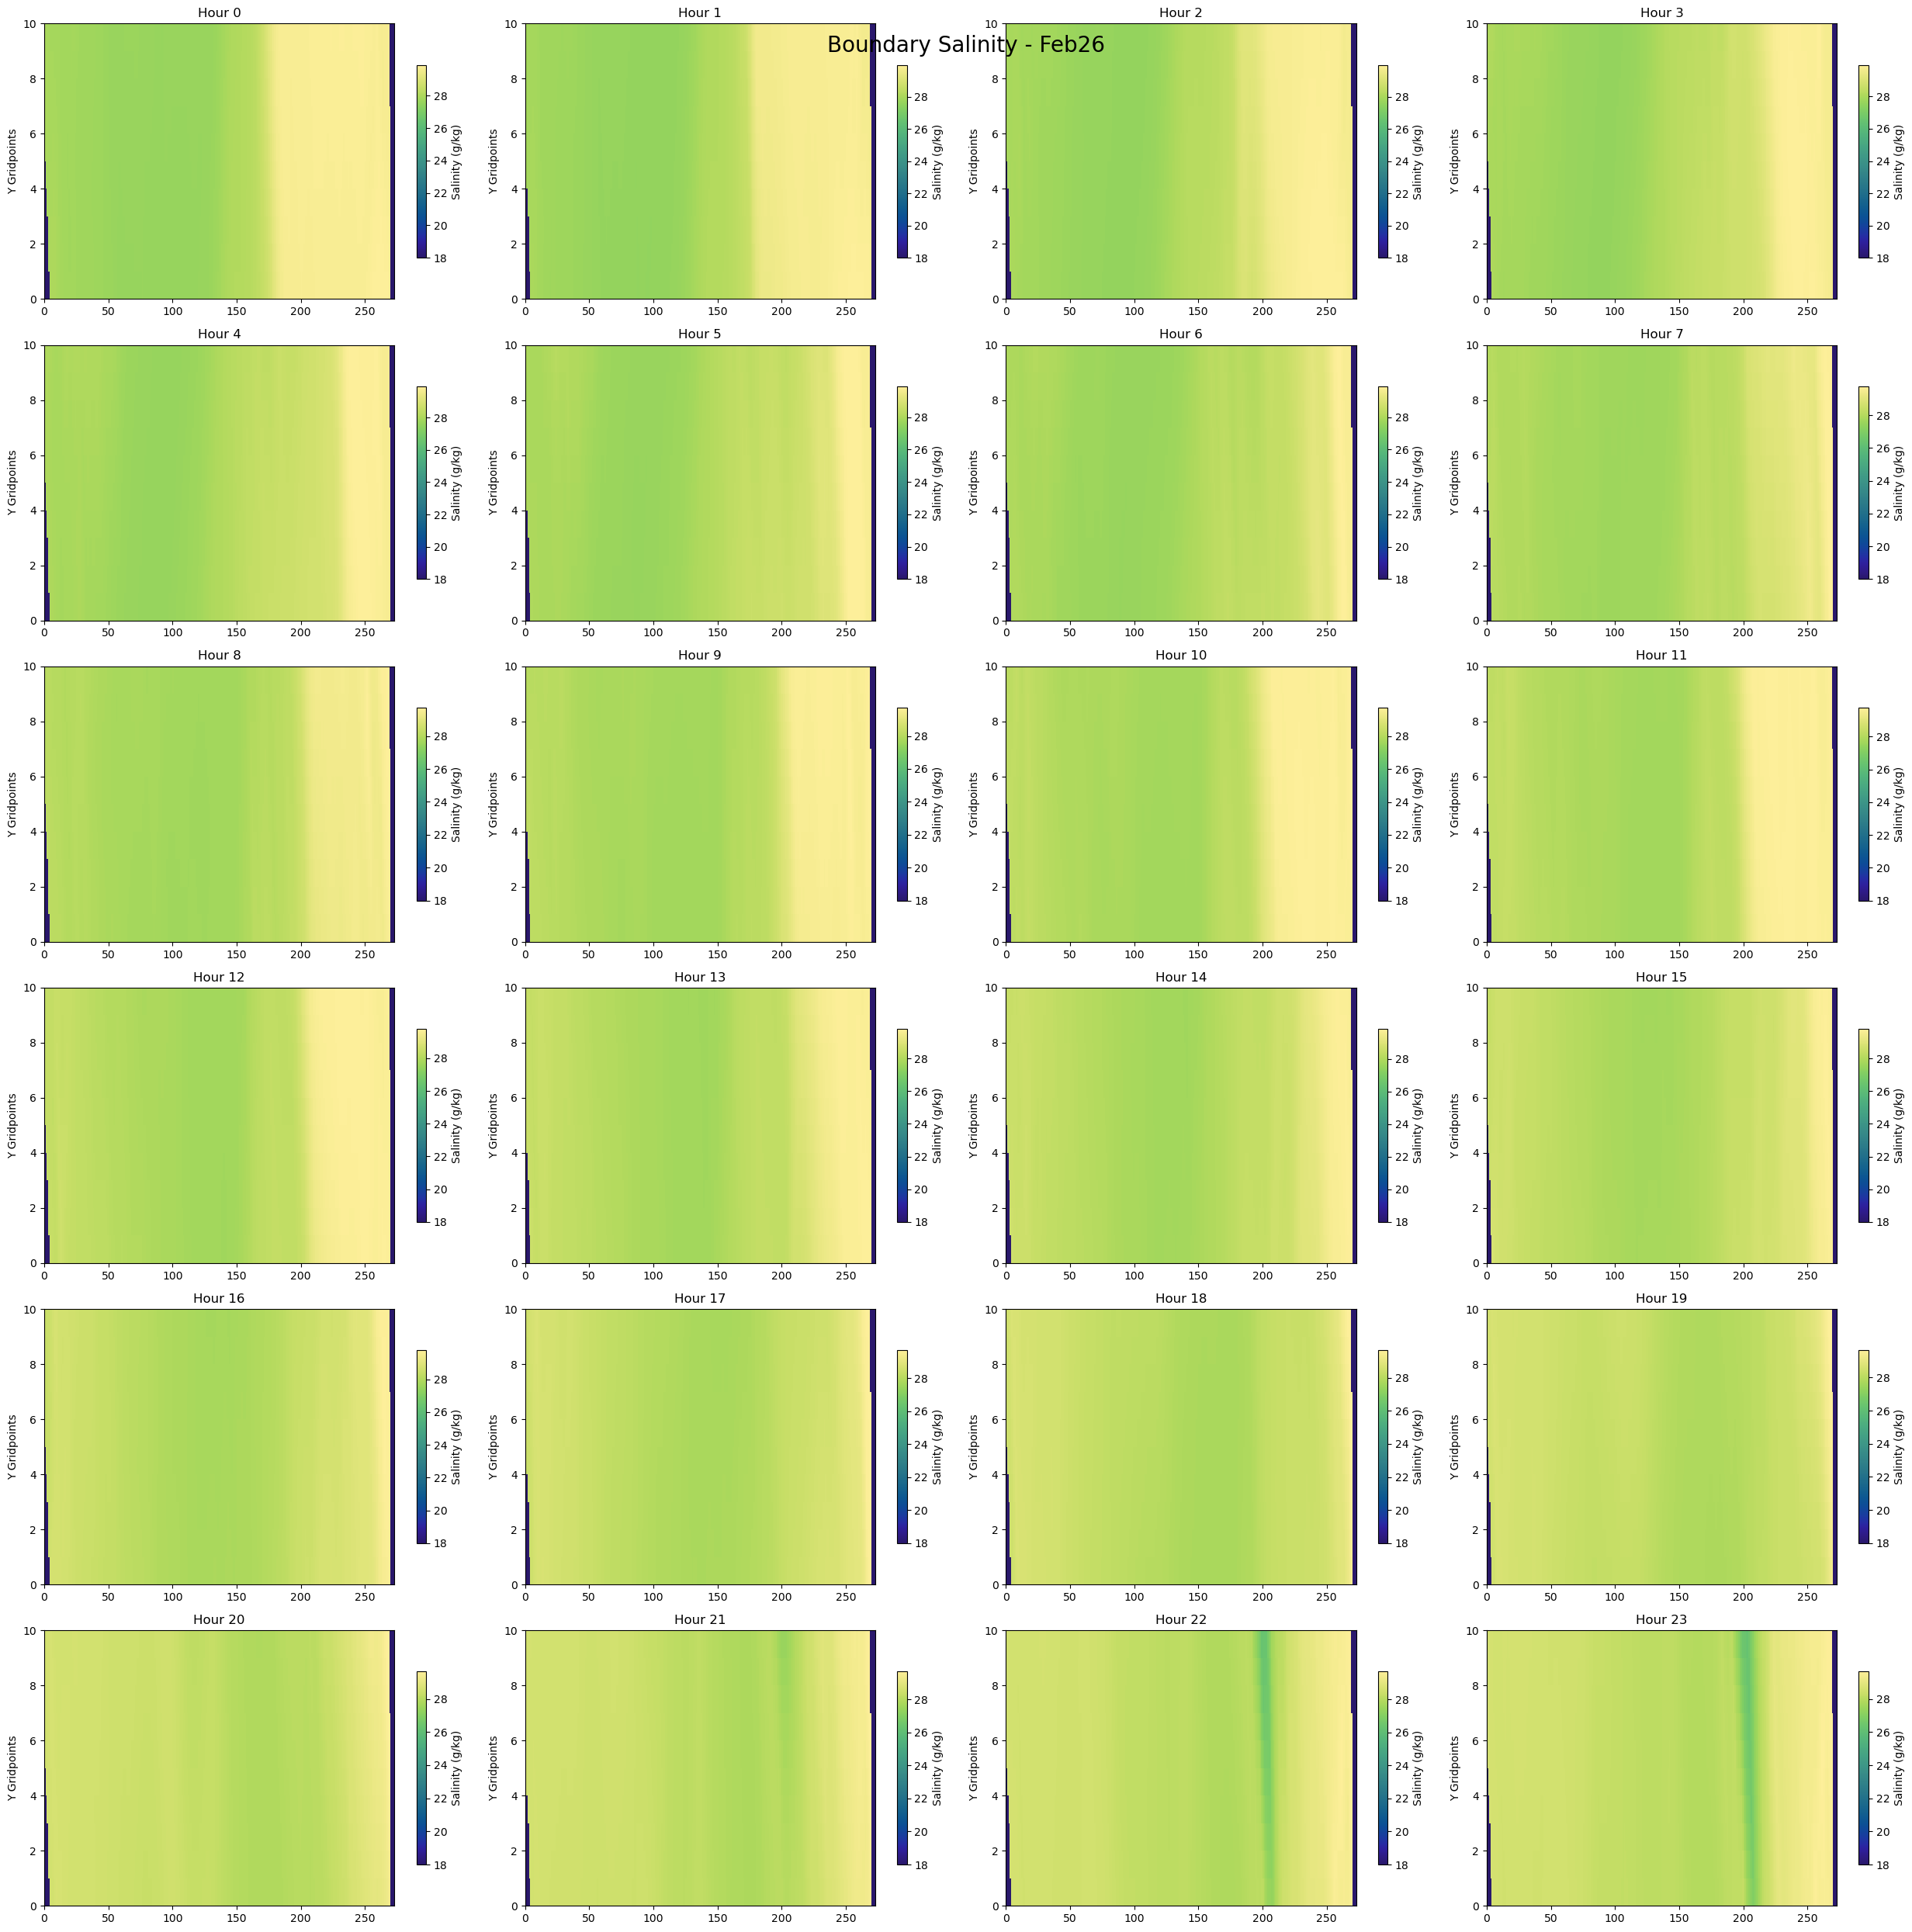

In [17]:
nrows = 6
ncols = 4

fig, ax = plt.subplots(nrows,ncols,figsize=(25, 25))
cmap = cm.cm.haline
cmap.set_bad('gray')

date = pd.DatetimeIndex(phys_gridU.time_counter.values)

for i in range(nrows):
    for j in range(ncols):
    
        vfull = BoundaryFile_Feb26.vosaline[i*ncols+j, 0]
        ax[i,j].pcolormesh(vfull,vmin=18)
        colours = ax[i,j].pcolormesh(vfull, cmap=cmap,vmin=18)
        cb = fig.colorbar(colours, ax=ax[i,j],shrink=0.7)
        cb.set_label('Salinity (g/kg)')
        # viz_tools.set_aspect(ax[i,j]);
        ax[i,j].set_ylabel('Y Gridpoints')
        ax[i,j].set_title(f'Hour {date[i*ncols+j].hour}')

fig.tight_layout()
fig.suptitle('Boundary Salinity - Feb26',fontsize=20)


Text(0.5, 1.0, 'Feb26: 23:30 - 00:30')

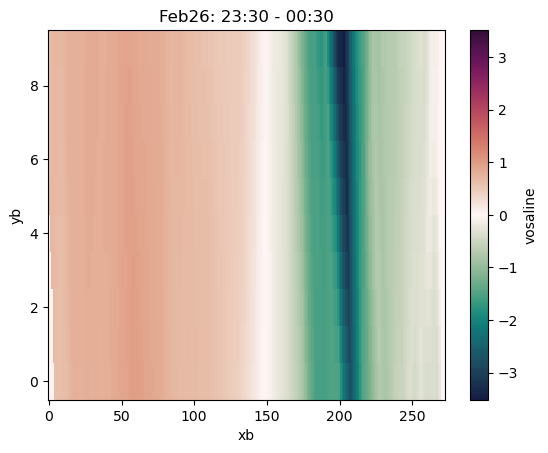

In [20]:
(BoundaryFile_Feb26.vosaline[23,0]-BoundaryFile_Feb26.vosaline[0,0]).plot(cmap = cm.cm.curl)
plt.title('Feb26: 23:30 - 00:30')

Text(0.5, 1.0, 'Feb26 00:30 - Feb25 11:30')

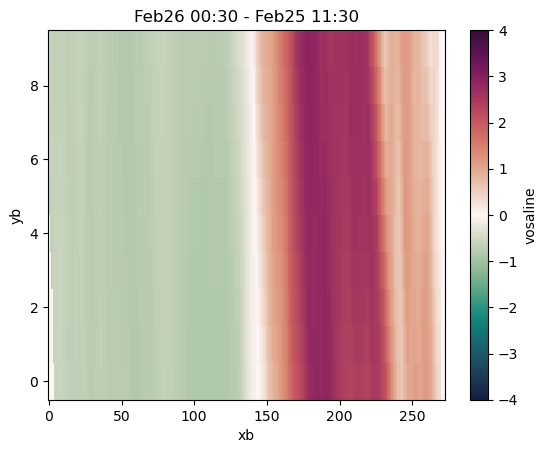

In [22]:
(BoundaryFile_Feb26.vosaline[0,0]-BoundaryFile.vosaline[23,0]).plot(cmap = cm.cm.curl,vmin=-4,vmax=4)
plt.title('Feb26 00:30 - Feb25 11:30')